#                       PUBG Game Winning Percentage Prediction

# Task - 1


### Report:


#### The PUBG dataset, which includes statistics like kills, damage dealt, and distance traveled, offers a thorough understanding of player behavior and gaming dynamics. The central variable is the {winPlacePerc}, which represents a player's ultimate placing (0 to 1). Different playing styles and possible relationships with important characteristics are shown by initial research. The focus of our model development will be on outlier detection, feature engineering, and using regression models to forecast victory place. Heatmaps and other visualizations will help make sense of player interactions. This dataset presents the ideal chance to identify features that affect PUBG gameplay success in a summarized study.

- groupId - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- matchId - Integer ID to identify match. There are no matches that are in both the training and testing set.
- assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- DBNOs - Number of enemy players knocked.
- headshotKills - Number of enemy players killed with headshots.
- heals - Number of healing items used.
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player.
- kills - Number of enemy players killed.
- killStreaks - Max number of enemy players killed in a short amount of time.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- numGroups - Number of groups we have data for in the match.
- revives - Number of times this player revived teammates.
- rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance - Total distance traveled by swimming measured in meters.
- teamKills - Number of times this player killed a teammate.
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
- weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of player.
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("pubg.csv") ## Loading Data Set

In [3]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


## Basic Checks

In [4]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
df.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [7]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [8]:
df.describe(include="O")

,Id,groupId,matchId,matchType
count,4446966,4446966,4446966,4446966
unique,4446966,2026745,47965,16
top,7f96b2f878858a,14d6b54cdec6bc,4b5db40aec4797,squad-fpp
freq,1,74,100,1756186


## Checking for Null values

In [9]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [10]:
np.where(df.isnull())

(array([2744604], dtype=int64), array([28], dtype=int64))

In [11]:
df.drop(2744604, inplace=True) ## Dropping the entire row with the null in target variable

### The overall size of the data is large so downsizing all possible features

In [12]:
df["assists"]=pd.to_numeric(df.assists,downcast="integer")
df["boosts"]=pd.to_numeric(df.boosts,downcast="integer")
df["damageDealt"]=pd.to_numeric(df.damageDealt,downcast="float")
df["DBNOs"]=pd.to_numeric(df.DBNOs,downcast="integer")
df["headshotKills"]=pd.to_numeric(df.headshotKills,downcast="integer")
df["heals"]=pd.to_numeric(df.heals,downcast="integer")
df["killPlace"]=pd.to_numeric(df.killPlace,downcast="integer")
df["killPoints"]=pd.to_numeric(df.killPoints,downcast="integer")
df["kills"]=pd.to_numeric(df.kills,downcast="integer")
df["killStreaks"]=pd.to_numeric(df.killStreaks,downcast="integer")
df["longestKill"]=pd.to_numeric(df.longestKill,downcast="float")
df["matchDuration"]=pd.to_numeric(df.matchDuration,downcast="integer")
df["maxPlace"]=pd.to_numeric(df.maxPlace,downcast="integer")
df["numGroups"]=pd.to_numeric(df.numGroups,downcast="integer")
df["rankPoints"]=pd.to_numeric(df.rankPoints,downcast="integer")
df["revives"]=pd.to_numeric(df.revives,downcast="integer")
df["rideDistance"]=pd.to_numeric(df.rideDistance,downcast="float")
df["roadKills"]=pd.to_numeric(df.roadKills,downcast="integer")
df["swimDistance"]=pd.to_numeric(df.swimDistance,downcast="float")
df["teamKills"]=pd.to_numeric(df.teamKills,downcast="integer")
df["vehicleDestroys"]=pd.to_numeric(df.vehicleDestroys,downcast="integer")
df["walkDistance"]=pd.to_numeric(df.walkDistance,downcast="float")
df["weaponsAcquired"]=pd.to_numeric(df.weaponsAcquired,downcast="integer")
df["winPoints"]=pd.to_numeric(df.winPoints,downcast="integer")
df["winPlacePerc"]=pd.to_numeric(df.winPlacePerc,downcast="float")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   

#### The overall size of the data has been reduced

## EDA

In [14]:
import sweetviz as sv     #library for univariant analysis

my_report = sv.analyze(df)

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Plotting Heatmap to check correlation between features and target variable

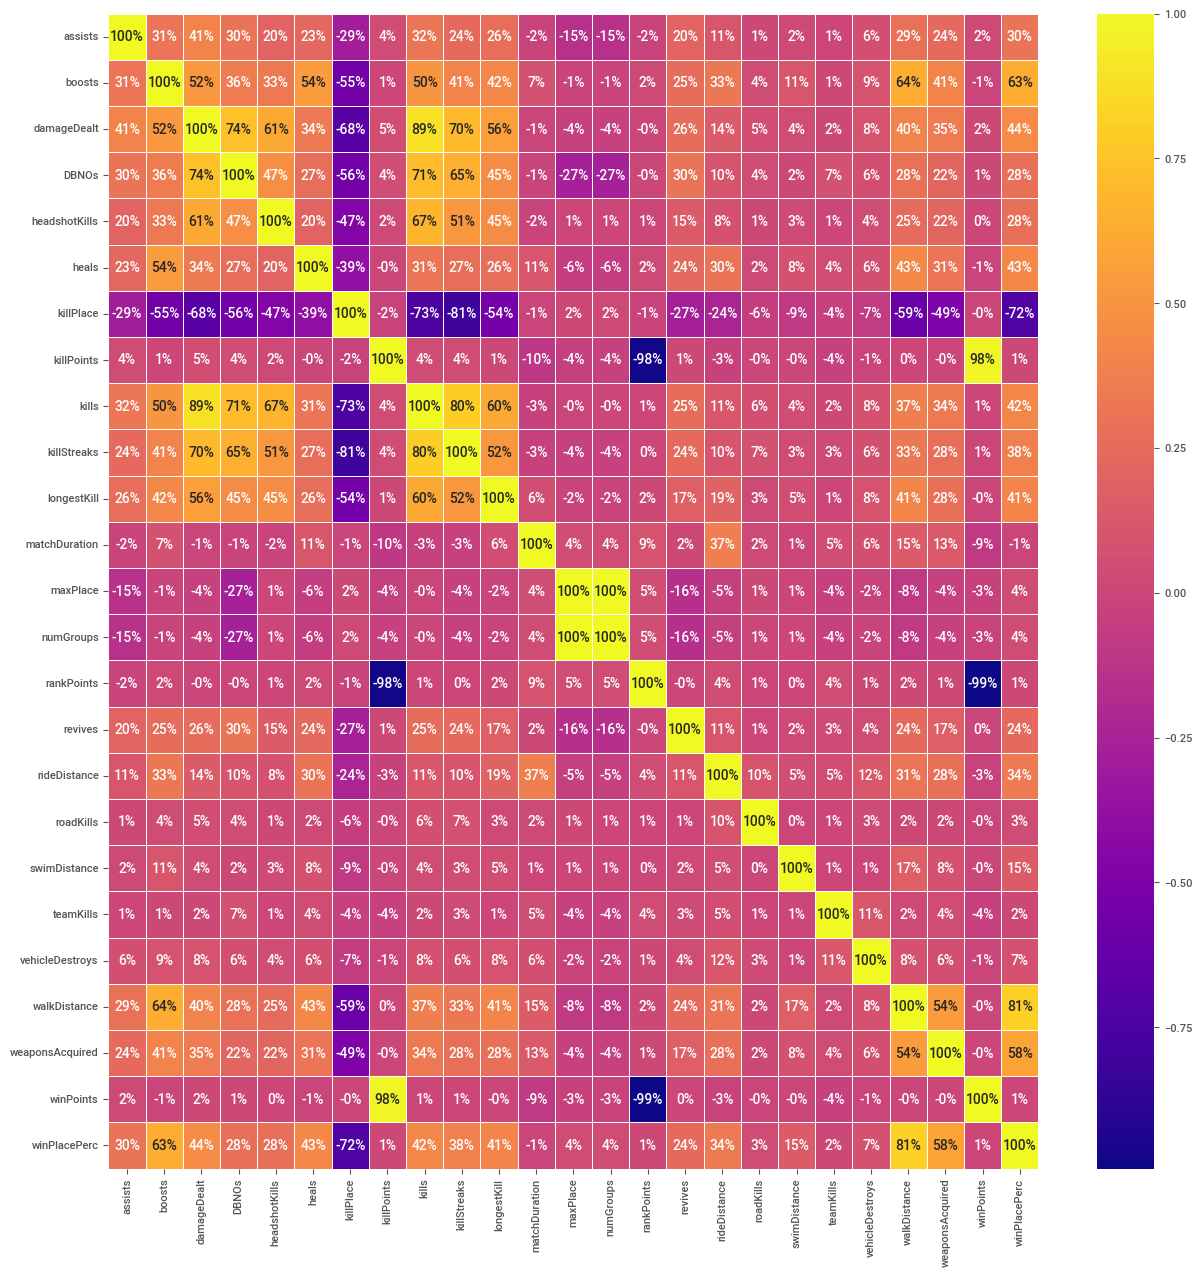

In [15]:
plt.figure(figsize=(15, 15)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.0%',cmap='plasma')
plt.show()

#### The heatmap shows that 8 features have high correlation with the target variable

### Creating a sample model with the selected features

In [16]:
data=df[['boosts','damageDealt','heals','kills','killStreaks','longestKill','walkDistance','weaponsAcquired','winPlacePerc']]
data ## Creating a new variable with the 8 features that are highly correlated

,boosts,damageDealt,heals,kills,killStreaks,longestKill,walkDistance,weaponsAcquired,winPlacePerc
0,0,0.000000,0,0,0,0.000000,244.800003,1,0.4444
1,0,91.470001,0,0,0,0.000000,1434.000000,5,0.6400
2,0,68.000000,0,0,0,0.000000,161.800003,2,0.7755
3,0,32.900002,0,0,0,0.000000,202.699997,3,0.1667
4,0,100.000000,0,1,1,58.529999,49.750000,2,0.1875
...,...,...,...,...,...,...,...,...,...
4446961,0,0.000000,0,0,0,0.000000,1019.000000,3,0.1786
4446962,1,44.150002,0,0,0,0.000000,81.699997,6,0.2935
4446963,0,59.060001,0,0,0,0.000000,788.700012,4,0.4815
4446964,4,180.399994,2,2,1,98.500000,2748.000000,8,0.8000


In [17]:
Xt=data.iloc[:,:-1]
Xt

,boosts,damageDealt,heals,kills,killStreaks,longestKill,walkDistance,weaponsAcquired
0,0,0.000000,0,0,0,0.000000,244.800003,1
1,0,91.470001,0,0,0,0.000000,1434.000000,5
2,0,68.000000,0,0,0,0.000000,161.800003,2
3,0,32.900002,0,0,0,0.000000,202.699997,3
4,0,100.000000,0,1,1,58.529999,49.750000,2
...,...,...,...,...,...,...,...,...
4446961,0,0.000000,0,0,0,0.000000,1019.000000,3
4446962,1,44.150002,0,0,0,0.000000,81.699997,6
4446963,0,59.060001,0,0,0,0.000000,788.700012,4
4446964,4,180.399994,2,2,1,98.500000,2748.000000,8


In [18]:
yt=data.winPlacePerc
yt

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4446965, dtype: float32

In [19]:
#train test split
from sklearn.model_selection import train_test_split
Xt_train,Xt_test,yt_train,yt_test=train_test_split(Xt,yt,test_size=0.2)

In [20]:
# model creation
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xt_train,yt_train)

LinearRegression()

In [21]:
yt_pred=model.predict(Xt_test)
yt_pred

array([0.18927506, 0.28727624, 0.8403758 , ..., 0.7505372 , 0.16413927,
       0.63970524], dtype=float32)

In [22]:
#model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
print(r2_score(yt_test,yt_pred))

0.7108777279189309


#### The model indicates that the 8 features give an accuracy of 71%. We aim to achive an accuracy of more than 85%. To proceed further we will be doing Preprocessing for Outliers and create new features

## Outlier Handling

<Axes: xlabel='boosts'>

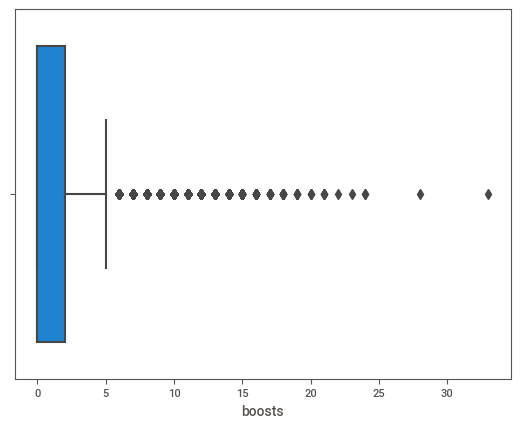

In [23]:
sns.boxplot(x=df.boosts)

<Axes: xlabel='damageDealt'>

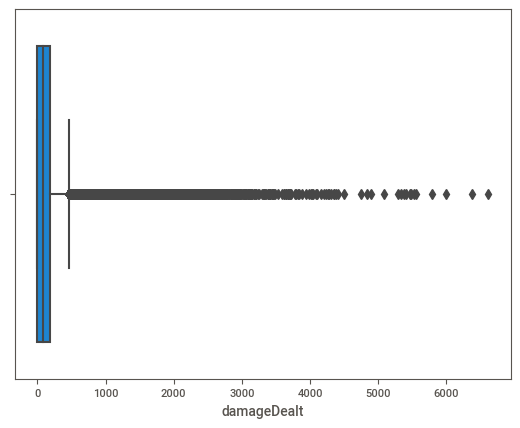

In [24]:
sns.boxplot(x=df.damageDealt)

<Axes: xlabel='heals'>

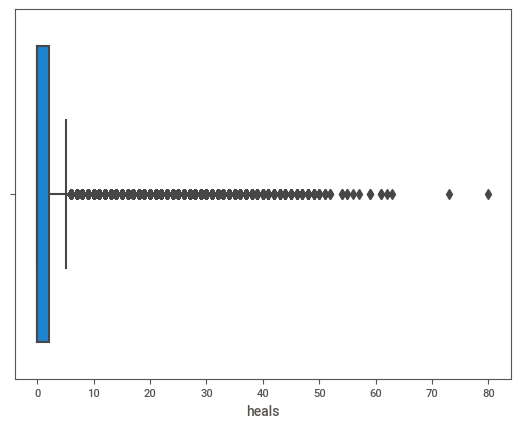

In [25]:
sns.boxplot(x=df.heals)

<Axes: xlabel='kills'>

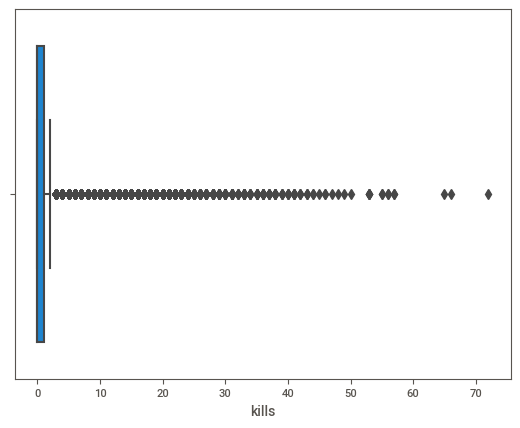

In [26]:
sns.boxplot(x=df.kills)

<Axes: xlabel='killStreaks'>

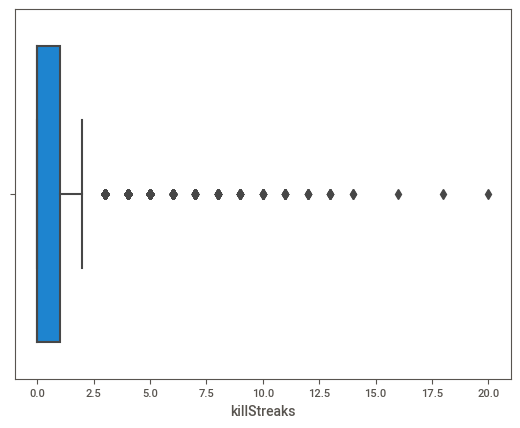

In [27]:
sns.boxplot(x=df.killStreaks)

<Axes: xlabel='longestKill'>

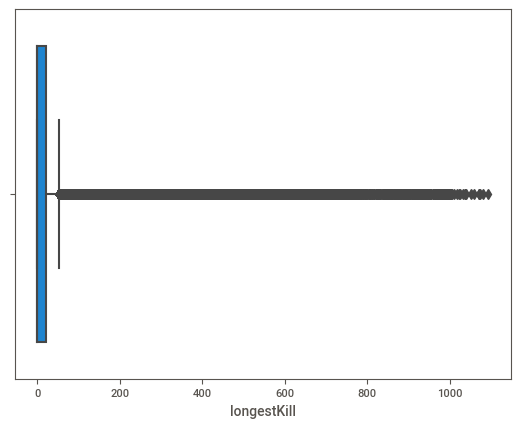

In [28]:
sns.boxplot(x=df.longestKill)

<Axes: xlabel='walkDistance'>

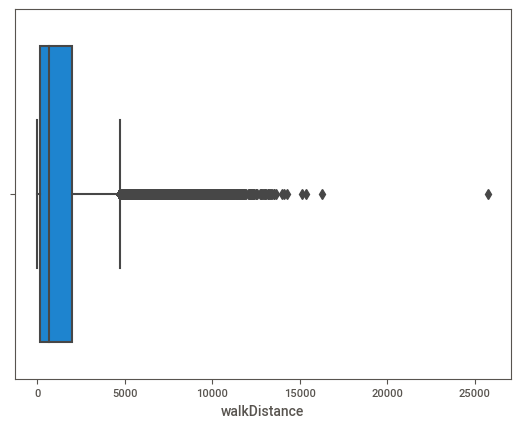

In [29]:
sns.boxplot(x=df.walkDistance)

<Axes: xlabel='weaponsAcquired'>

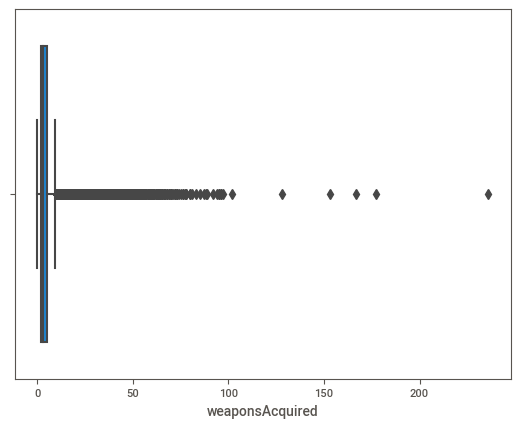

In [30]:
sns.boxplot(x=df.weaponsAcquired)

### The boxplots show that all the 8 features have significant outliers

### Pairplot to check relation between all the features and the target 

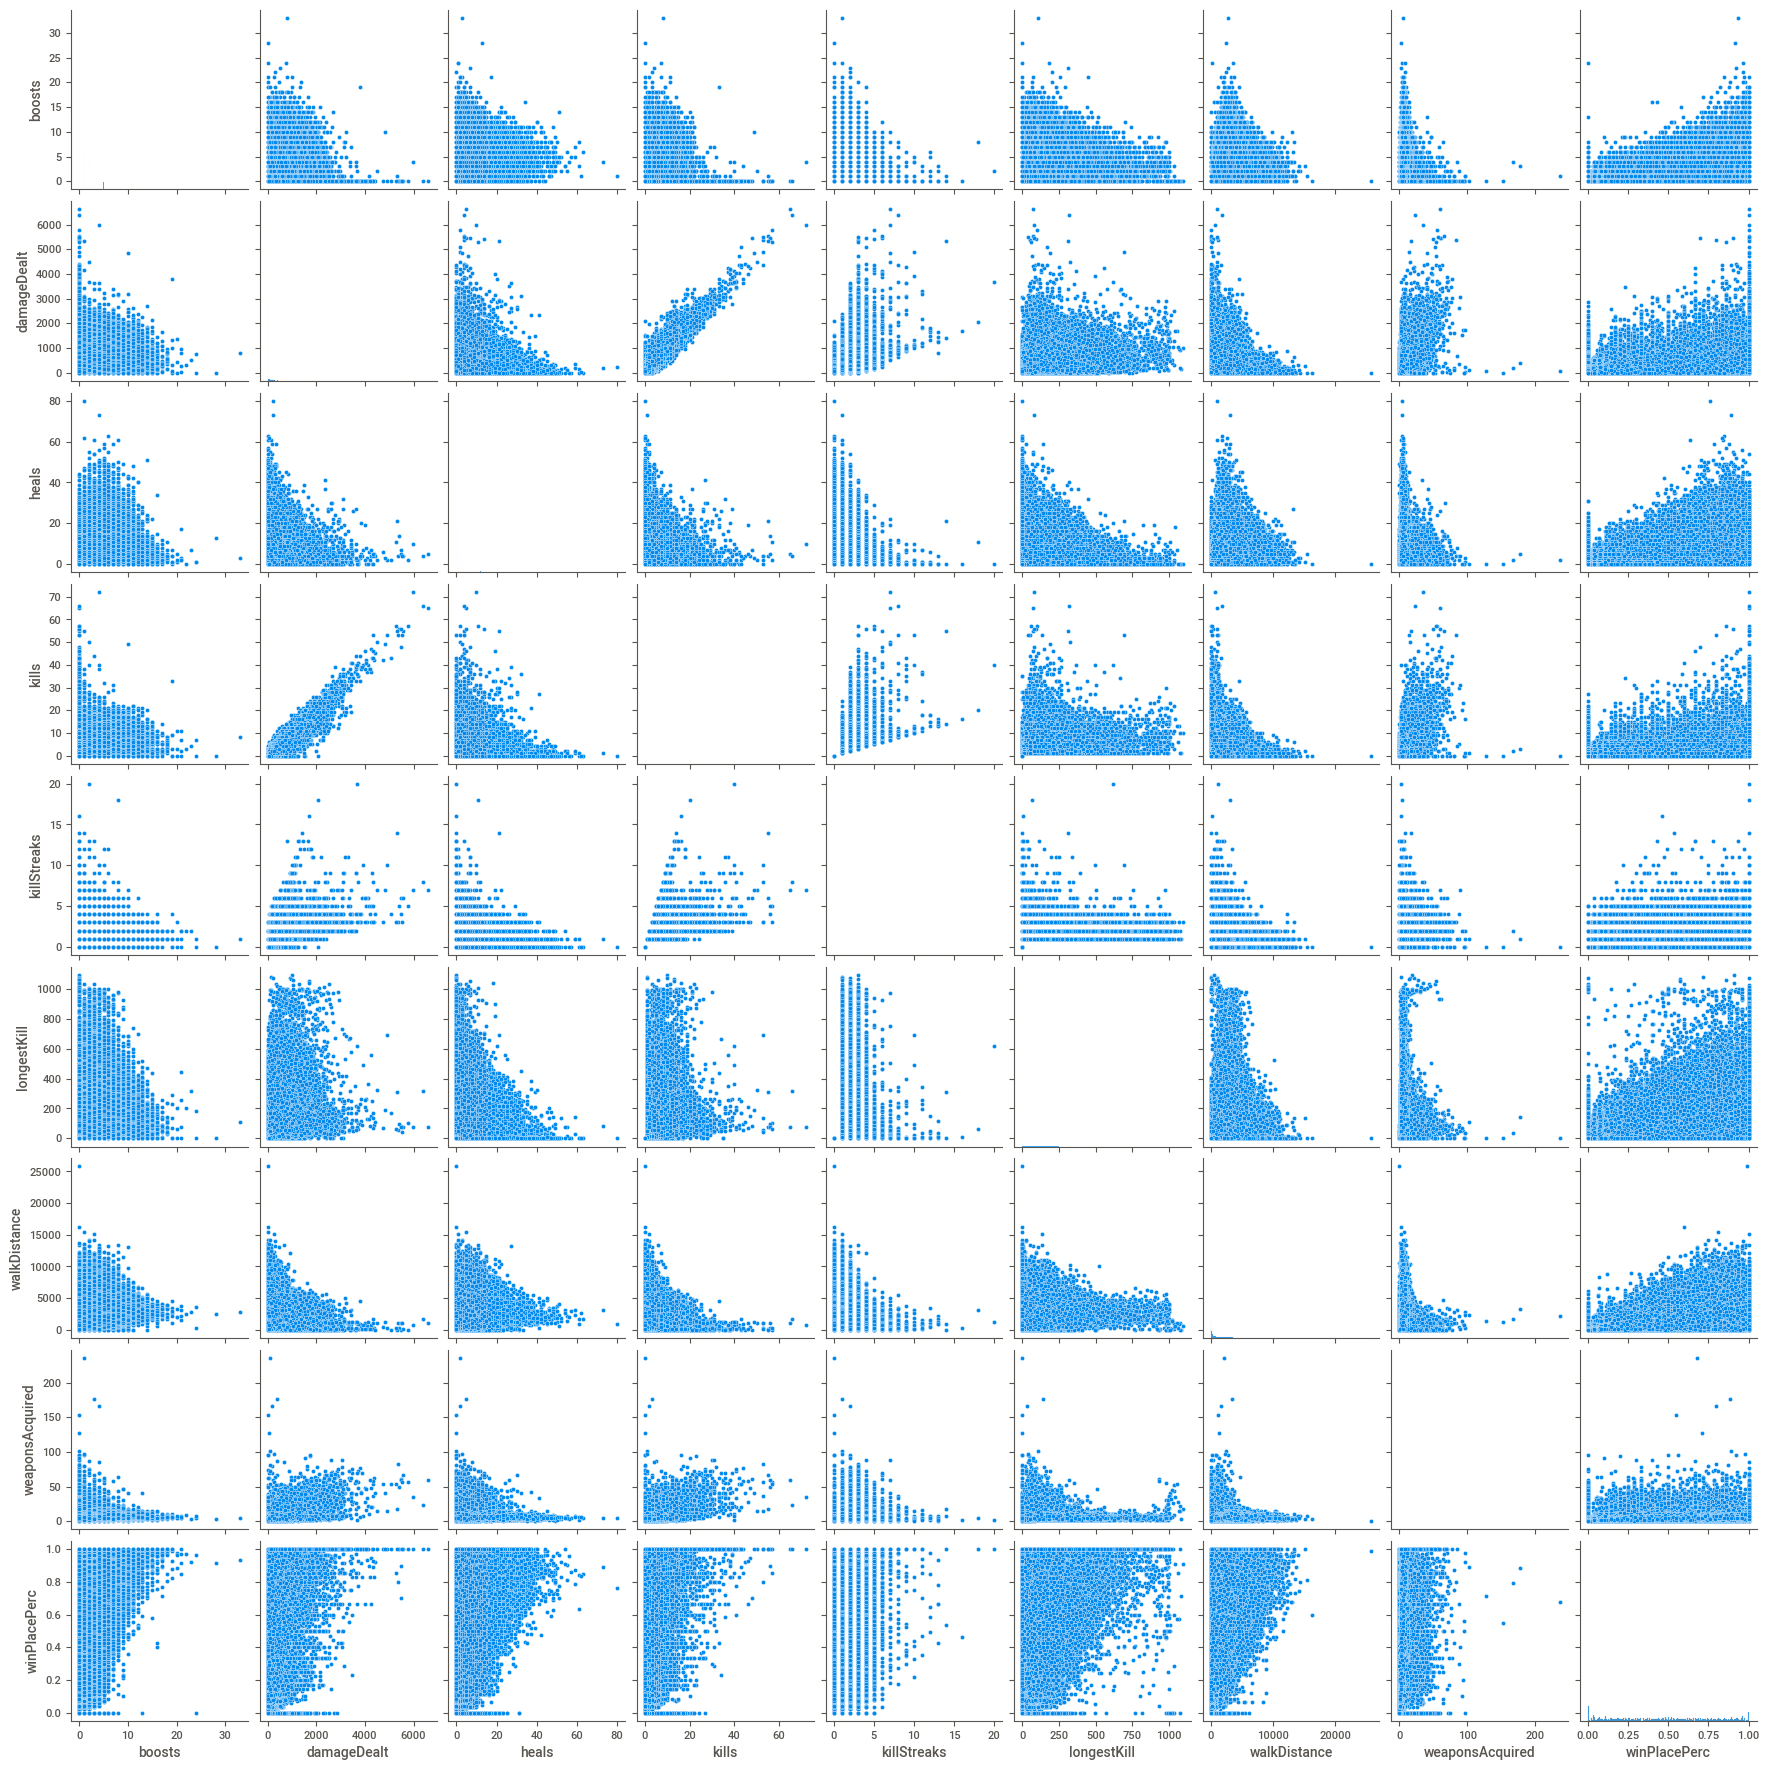

In [31]:
sns.pairplot(data, size=2)
plt.show()

In [32]:
dfo=df.iloc[:,:]
dfo ## Creating a variable solely for detecting outliers

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.800003,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.000000,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.800003,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.699997,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.750000,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.000000,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.000000,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150002,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.699997,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.060001,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.700012,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.399994,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.000000,8,0,0.8000


In [33]:
# Function to calculate percentage of outliers in a numerical column
def percentage_outliers(column):
    Q1, Q3 = column.quantile([0.25, 0.75])
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outliers = (column < lower_bound) | (column > upper_bound)

    # Calculate the percentage of outliers
    percentage = outliers.mean() * 100

    return percentage

# Calculate the percentage of outliers for each numerical column
outliers_percentage = dfo.select_dtypes(include='number').apply(percentage_outliers)

print(outliers_percentage)


assists            17.524446
boosts              3.197484
damageDealt         4.847036
DBNOs               6.629937
headshotKills      16.884549
heals               7.332079
killPlace           0.000000
killPoints          0.000000
kills              11.619138
killStreaks         1.176983
longestKill        13.816772
matchDuration       0.059029
maxPlace           15.782922
numGroups          15.714088
rankPoints          0.001394
revives            13.202240
rideDistance       24.967185
roadKills           0.292244
swimDistance        6.504931
teamKills           2.179689
vehicleDestroys     0.759035
walkDistance        0.606661
weaponsAcquired     1.763203
winPoints           0.000000
winPlacePerc        0.000000
dtype: float64


### The following variables have more than 10%outliers 

In [34]:
dfh=df[['assists','headshotKills','kills','longestKill','maxPlace','numGroups','revives']]
dfh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   assists        int8   
 1   headshotKills  int8   
 2   kills          int8   
 3   longestKill    float32
 4   maxPlace       int8   
 5   numGroups      int8   
 6   revives        int8   
dtypes: float32(1), int8(6)
memory usage: 76.3 MB


### Since in rideDistance the outliers account for nearly 25%of the data, we will first handle the rideDistance feature

In [35]:
# zscore
from scipy import stats
zscore=stats.zscore(df.rideDistance)
df1=df[(zscore>=-3)&(zscore<=3)]
df1

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.800003,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.000000,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.800003,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.699997,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.750000,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.000000,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.000000,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150002,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.699997,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.060001,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.700012,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.399994,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.000000,8,0,0.8000


In [36]:
m=np.median(df1.rideDistance)
m

0.0

In [37]:
# IQR
iqr=stats.iqr(df1.rideDistance)
iqr

0.0

In [38]:
q1=np.percentile(df1.rideDistance,25)
q1

0.0

In [39]:
q3=np.percentile(df1.rideDistance,75)
q3

0.0

In [40]:
##  sns.histplot(x=df.rideDistance)
##  plt.show     --------- The histplot for the feature rideDistance is not being plot due to system limitations

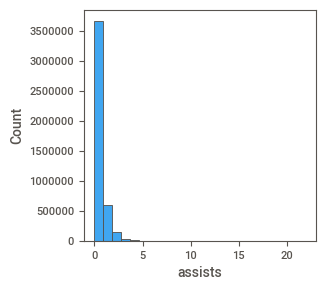

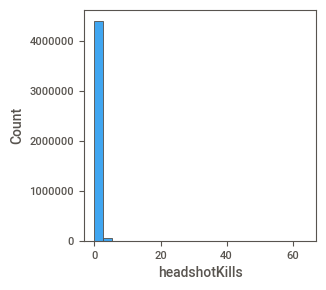

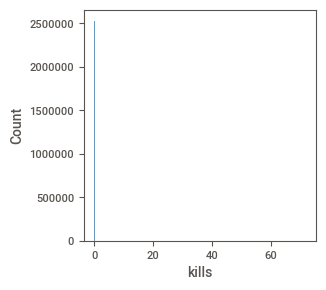

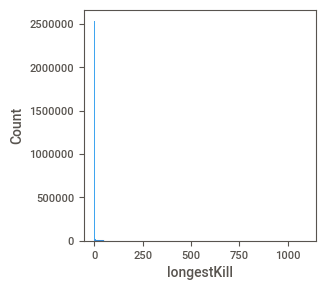

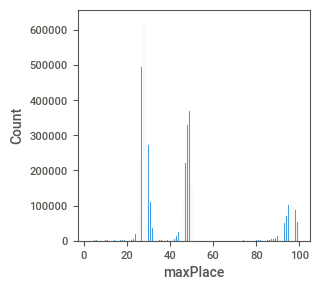

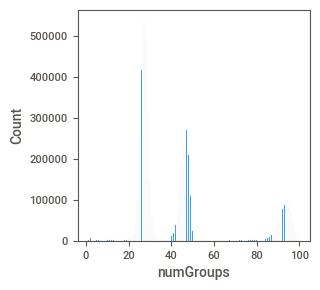

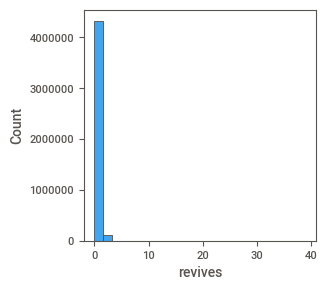

In [41]:
## Plotting Histplots to understand the distribution of the data
numerical_columns = dfh
for col in numerical_columns:
    plt.figure(figsize=(3,3))
    sns.histplot(data=dfh, x=col)
    plt.show()


#### From the above graphs we can interpret the median values for all the  variabes will be 0, hence imputing will cause more complexity in the data




#### Since the Outliers moslty lie after the 3rd standard deviation, and since we have to use the median to impute the outlier values, we are instead creating new features that will overcome the impact of outliers on our data and help the ML model learn efficiently and give better accuracy

## Feature Engineering

#### According to domain analysis, we know that a single match have a capacity of 100 players, but each match may not necessarily have 100 players. Creating a new column indicating the actual number of Players In Match. 

In [42]:
df['playersinmatch'] = df.groupby('matchId')['matchId'].transform('count')

#### Looking at the features we see that even tough some features do not highly correlate with the target variable, but combining them into a single feature will give a better insight towards the target variable

In [43]:
df['resources']=df["heals"]+df["boosts"]+df["weaponsAcquired"]
## since heals, boosts and weapons are considered resources we can combine them into a single feature

df['totalDistance'] = df['walkDistance']+df['rideDistance']+df['swimDistance']
## Different ways of distance covered in a single match have different correlation, 
## we can combine them into a single feature for better correlation

#### We can create a significant number of additional information based on the 'PlayersInMatch' feature in order to normalize their values. Creating "killsNorm" and "damageDealtNorm" features. In a game with 100 players, it will be easier to get kill than it is with 90. In order to normalize the kills, setting the score for each kill at 1 for all 100 players and (100-90)/100 + 1 = 1.1 for all 90 players. Keeping +1 to make sure values are greater than actual value

In [44]:
df['killsNorm'] = df['kills']*((100-df['playersinmatch'])/100 + 1)
df['damageDealtNorm'] = df['damageDealt']*((100-df['playersinmatch'])/100 + 1)

In [45]:
df.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersinmatch,resources,totalDistance,killsNorm,damageDealtNorm
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,...,0,244.800003,1,1466,0.4444,96,1,244.800003,0.00,0.000000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,...,0,1434.000000,5,0,0.6400,91,5,1445.044556,0.00,99.702301
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,0,161.800003,2,0,0.7755,98,2,161.800003,0.00,69.360000
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,...,0,202.699997,3,0,0.1667,91,3,202.699997,0.00,35.861002
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,0,49.750000,2,0,0.1875,97,2,49.750000,1.03,103.000000
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000000,1,1,0,44,...,0,34.700001,1,0,0.0370,95,1,34.700001,1.05,105.000000
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000000,0,0,0,96,...,0,13.500000,1,1497,0.0000,97,1,13.500000,0.00,0.000000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538000,0,0,0,48,...,0,1089.000000,6,1500,0.7368,96,6,3093.000000,0.00,8.879520
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.599998,0,0,0,64,...,0,799.900024,4,0,0.3704,97,4,799.900024,0.00,53.147998
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270000,0,0,0,74,...,0,65.669998,1,0,0.2143,97,1,65.669998,0.00,38.388100


# Preparation for Machine Learning

## Creating Regression models based on the new features

### Creating a Linear Regression Model

In [46]:
X=df.iloc[:,3:]
X

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersinmatch,resources,totalDistance,killsNorm,damageDealtNorm
0,0,0,0.000000,0,0,0,60,1241,0,0,...,0,244.800003,1,1466,0.4444,96,1,244.800003,0.00,0.000000
1,0,0,91.470001,0,0,0,57,0,0,0,...,0,1434.000000,5,0,0.6400,91,5,1445.044556,0.00,99.702301
2,1,0,68.000000,0,0,0,47,0,0,0,...,0,161.800003,2,0,0.7755,98,2,161.800003,0.00,69.360000
3,0,0,32.900002,0,0,0,75,0,0,0,...,0,202.699997,3,0,0.1667,91,3,202.699997,0.00,35.861002
4,0,0,100.000000,0,0,0,45,0,1,1,...,0,49.750000,2,0,0.1875,97,2,49.750000,1.03,103.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.000000,0,0,0,74,1029,0,0,...,0,1019.000000,3,1507,0.1786,94,3,2311.000000,0.00,0.000000
4446962,0,1,44.150002,0,0,0,69,0,0,0,...,0,81.699997,6,0,0.2935,93,7,81.699997,0.00,47.240502
4446963,0,0,59.060001,0,0,0,66,0,0,0,...,0,788.700012,4,0,0.4815,98,4,790.884033,0.00,60.241201
4446964,0,4,180.399994,1,1,2,11,0,2,1,...,0,2748.000000,8,0,0.8000,94,14,2748.000000,2.12,191.223994


In [47]:
X.drop(columns=["winPlacePerc",'matchType'],inplace=True) ## dropping c

In [48]:
X

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,playersinmatch,resources,totalDistance,killsNorm,damageDealtNorm
0,0,0,0.000000,0,0,0,60,1241,0,0,...,0,0,244.800003,1,1466,96,1,244.800003,0.00,0.000000
1,0,0,91.470001,0,0,0,57,0,0,0,...,0,0,1434.000000,5,0,91,5,1445.044556,0.00,99.702301
2,1,0,68.000000,0,0,0,47,0,0,0,...,0,0,161.800003,2,0,98,2,161.800003,0.00,69.360000
3,0,0,32.900002,0,0,0,75,0,0,0,...,0,0,202.699997,3,0,91,3,202.699997,0.00,35.861002
4,0,0,100.000000,0,0,0,45,0,1,1,...,0,0,49.750000,2,0,97,2,49.750000,1.03,103.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.000000,0,0,0,74,1029,0,0,...,0,0,1019.000000,3,1507,94,3,2311.000000,0.00,0.000000
4446962,0,1,44.150002,0,0,0,69,0,0,0,...,0,0,81.699997,6,0,93,7,81.699997,0.00,47.240502
4446963,0,0,59.060001,0,0,0,66,0,0,0,...,0,0,788.700012,4,0,98,4,790.884033,0.00,60.241201
4446964,0,4,180.399994,1,1,2,11,0,2,1,...,0,0,2748.000000,8,0,94,14,2748.000000,2.12,191.223994


In [49]:
y=df.winPlacePerc
y

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4446965, dtype: float32

In [50]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [51]:
# model creation
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred=model.predict(X_test)
y_pred

array([0.58192193, 0.39765423, 0.53718567, ..., 0.59698252, 0.39467336,
       0.22240739])

In [53]:
#model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
print(r2_score(y_test,y_pred))

0.8405388653236234


In [54]:
mean_absolute_error(y_test,y_pred)

0.08967839278864774

In [55]:
mean_squared_error(y_test,y_pred)

0.01506455076432629

## We can see that using the new features we get an accuracy of 84%

### Creating a Regression model by applying PCA (Reducing Dimensions for efficiency)

In [56]:
from sklearn.decomposition import PCA

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xscaled=scaler.fit_transform(X)

In [58]:
pca=PCA(.95)
newdata=pca.fit_transform(Xscaled)
Xpca=pd.DataFrame(data=newdata)

In [59]:
Xpca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-2.594731,2.306416,-0.356969,0.848266,-0.129654,0.208869,0.260418,0.185867,0.096061,-0.161916,-0.455776,0.071457,-0.037392,-0.668125,-0.050712,0.101731,0.013663
1,-1.331914,-1.468536,-0.060187,1.175788,0.053416,-0.750255,-0.309538,0.369932,-0.267906,0.013309,-0.150915,0.015913,-0.130972,1.032048,-0.016574,0.288381,-0.195545
2,-1.961739,-0.805051,1.287122,0.177622,-0.708927,0.361524,0.092462,-0.134580,0.427313,-0.752139,0.280398,-1.308516,-0.297964,-0.468123,0.229303,-0.223448,0.257047
3,-2.382647,-0.919672,0.832841,1.131874,-0.224577,-0.394151,-0.300219,0.110257,0.205927,-0.166990,-0.212700,0.075046,0.073528,-0.184514,0.146361,0.368743,0.218635
4,-1.260957,-0.874692,2.349485,-2.795716,-0.024327,0.230244,0.087245,-0.053262,0.076751,-0.105310,0.130364,0.078994,-0.516856,-0.526261,-0.403257,-0.672762,0.816340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446960,-1.984219,1.256034,-1.777507,0.579707,1.100496,-0.489247,0.334199,-0.153735,-0.551646,0.055244,0.019432,-0.064369,0.204179,0.427929,-0.081322,0.268485,-0.154719
4446961,-1.946437,-1.459534,0.892137,-2.520204,-0.821037,-0.308465,-0.963821,-0.218757,0.584055,-0.048189,0.246255,-0.000156,-0.312786,0.225229,0.627194,0.357356,0.525974
4446962,-1.952808,-1.010823,0.629959,1.072104,-0.697582,0.207381,0.194897,0.194395,0.176197,-0.227271,-0.758537,-0.163196,-0.374408,0.068435,0.513120,0.467886,0.263065
4446963,3.733391,-1.278440,-0.061200,1.222278,-1.876423,0.786123,0.331561,-0.521526,0.330544,0.577647,0.942364,2.076329,-2.160593,0.238407,-0.775099,1.809516,0.231754


In [60]:
ypca=df.winPlacePerc

In [61]:
#train test split
from sklearn.model_selection import train_test_split
Xpca_train,Xpca_test,ypca_train,ypca_test=train_test_split(Xpca,ypca,test_size=0.2)

In [62]:
# model creation
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xpca_train,ypca_train)

LinearRegression()

In [63]:
ypca_pred=model.predict(Xpca_test)

In [64]:
r2_score(ypca_test,ypca_pred)

0.7748396063002546

In [65]:
mean_absolute_error(ypca_test,ypca_pred)

0.11103759531571959

In [66]:
mean_squared_error(ypca_test,ypca_pred)

0.02127451150520586

#### We get an accuracy of approximately 77% using PCA

### Creating a Regression Model by using Gradient Boost

In [67]:
Xg=df.iloc[:,3:]

In [68]:
Xg.drop(columns=['winPlacePerc','matchType',],inplace=True)

In [69]:
yg=df.winPlacePerc

In [70]:
Xg_train,Xg_test,yg_train,yg_test=train_test_split(Xg,yg,test_size=0.2)

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
model=GradientBoostingRegressor()
model.fit(Xg_train,yg_train)

GradientBoostingRegressor()

In [73]:
yg_pred=model.predict(Xg_test)

In [77]:
r2_score(yg_test,yg_pred)

0.9052862169528146

In [78]:
mean_absolute_error(yg_test,yg_pred)

0.06642561000105944

In [76]:
mean_squared_error(yg_test,yg_pred)

0.008950872279092338

## Final Report

### Our data analysis project encountered a set of challenges, notably in handling outliers, addressing system limitations, and mitigating the risk of potential data loss. Managing outliers was particularly intricate due to the skewed distribution of data. We employed a robust technique, standardizing the data to bring it towards the mean, providing stability in the face of extreme values.

### Despite these challenges, we successfully developed three predictive models: linear regression, principal component analysis (PCA) followed by linear regression, and gradient boosting. The performance metrics were noteworthy, with an accuracy rate of 84% for linear regression, approximately 75% for PCA, and an impressive 90% for gradient boosting.

### An interesting observation was the limited impact of outliers on our models. This resilience could be attributed to effective feature engineering, where new variables such as 'playersinmatch' and aggregated resources like heals, boosts, and weapons, as well as metrics including 'killsnorm,' 'damagedealtnorm,' and 'total distance traveled,' played a significant role in enhancing the predictive capabilities of our models.

## In conclusion, despite the intricacies posed by outlier handling and other challenges, our approach demonstrated robustness, and thoughtful feature engineering proved instrumental in achieving accurate predictions. The utilization of standardized data, coupled with the creation of meaningful features, underscored the project's success in navigating complex data dynamics.